In [97]:
# ECGR 4105 HW1: Test/Train split and input normalization
# Author: Lucas Therrien
# Student ID #801122089
# GitHub Link: https://github.com/lucastherrien/ECGR4105HW1

In [98]:
##_________________________________________##
## Setup
##_________________________________________##

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [100]:
# Import dataset

hd = pd.read_csv('Housing.csv')
hd.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [101]:
# Gradient Descent and Loss functions

def compute_loss(X, y, theta): 
    preds = X.dot(theta)
    errors = np.subtract(preds, y)
    sqrErrors = np.square(errors)
    loss = 1 / (2 * samples) * np.sum(sqrErrors)
    return loss

def gradient_descent(X, y, theta, lr, iterations): 
    history = np.zeros(iterations) 
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, y, theta) 
 
    return theta, history

def gradient_descent_with_validation(X, y, Xval, Yval, theta, lr, iterations): 
    history = np.zeros(iterations) 
    val_history = np.zeros(iterations)
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, y, theta) 
        val_history[i] = compute_loss(Xval, Yval, theta)

    return theta, history, val_history

In [102]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [103]:
# Problem 1a, multiple linear regression for housing market with parameters:
# area, bedrooms, bathrooms, stories, parking
lr = 10 ** -2; # Optimal learning rate

In [104]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [105]:
# Output variable (housing price)
y = hd[['price']]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [106]:
# Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [107]:
x_train[0:5]
#x_train.shape

array([[1.000e+00, 6.840e+03, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00],
       [1.000e+00, 2.953e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 6.000e+03, 4.000e+00, 2.000e+00, 4.000e+00, 0.000e+00],
       [1.000e+00, 3.100e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 8.250e+03, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]])

In [108]:
x_test[0:5]

array([[1.000e+00, 3.750e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 3.960e+03, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 4.600e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.986e+03, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 7.950e+03, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00]])

In [109]:
y_train[0:5]
#y_train.shape

array([[8120000],
       [4200000],
       [6755000],
       [3360000],
       [3773000]], dtype=int64)

In [110]:
y_test[0:5]

array([[3010000],
       [2800000],
       [3010000],
       [3150000],
       [8400000]], dtype=int64)

In [111]:
# Train model with Gradient Descent
iters = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 1a regression: ",theta)
print("training loss history for 1a regression: ", train_loss)
print("validation loss history for 1a regression: ", val_loss)

theta values for 1a regression:  [[3.97873036e+136]
 [2.42058341e+140]
 [1.20481064e+137]
 [5.34030672e+136]
 [7.43215588e+136]
 [3.21452200e+136]]
training loss history for 1a regression:  [1.14403540e+024 1.13381033e+035 1.12367664e+046 1.11363353e+057
 1.10368018e+068 1.09381579e+079 1.08403957e+090 1.07435072e+101
 1.06474847e+112 1.05523205e+123 1.04580067e+134 1.03645359e+145
 1.02719006e+156 1.01800932e+167 1.00891063e+178 9.99893265e+188
 9.90956495e+199 9.82099599e+210 9.73321864e+221 9.64622581e+232
 9.56001051e+243 9.47456577e+254 9.38988472e+265 9.30596052e+276
 9.22278641e+287]
validation loss history for 1a regression:  [2.74548884e+023 2.72095035e+034 2.69663125e+045 2.67252950e+056
 2.64864317e+067 2.62497033e+078 2.60150907e+089 2.57825750e+100
 2.55521374e+111 2.53237595e+122 2.50974227e+133 2.48731089e+144
 2.46507999e+155 2.44304778e+166 2.42121250e+177 2.39957237e+188
 2.37812565e+199 2.35687062e+210 2.33580556e+221 2.31492877e+232
 2.29423858e+243 2.27373331e+254 

Text(0.5, 1.0, '1a training loss')

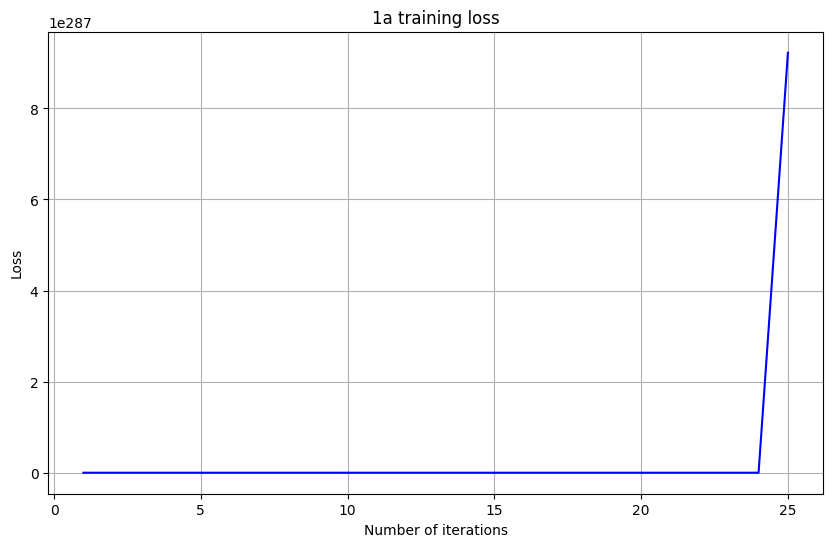

In [112]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1a training loss') 

Text(0.5, 1.0, '1a validation loss')

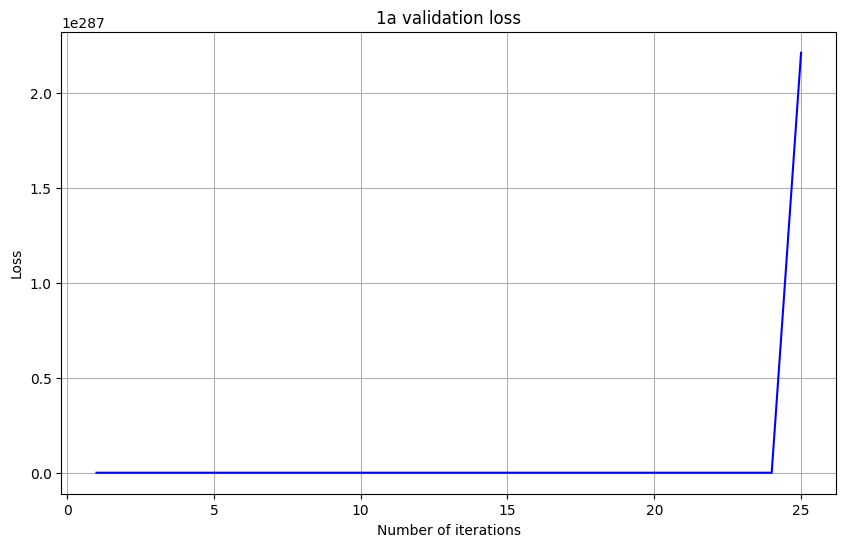

In [113]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1a validation loss') 

In [114]:
# Problem 1b, multiple linear regression for housing market with parameters:
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
# hotwaterheating, airconditioning, parking, prefarea
lr = 10 ** -2; # Optimal learning rate

In [115]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [116]:
# Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [117]:
# Train model with Gradient Descent
iters = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 1a regression: ",theta)
print("training loss history for 1a regression: ", train_loss)
print("validation loss history for 1a regression: ", val_loss)

theta values for 1a regression:  [[5.19777493e+136]
 [3.19185073e+140]
 [1.56128270e+137]
 [6.86693990e+136]
 [9.43332590e+136]
 [4.38090840e+136]
 [4.65265103e+136]
 [9.85295632e+135]
 [1.88325199e+136]
 [2.16636025e+135]
 [1.89813872e+136]
 [1.48820694e+136]]
training loss history for 1a regression:  [1.14817535e+024 1.16483820e+035 1.18174286e+046 1.19889284e+057
 1.21629172e+068 1.23394310e+079 1.25185064e+090 1.27001806e+101
 1.28844914e+112 1.30714770e+123 1.32611762e+134 1.34536284e+145
 1.36488736e+156 1.38469522e+167 1.40479055e+178 1.42517750e+189
 1.44586033e+200 1.46684331e+211 1.48813080e+222 1.50972723e+233
 1.53163708e+244 1.55386489e+255 1.57641528e+266 1.59929294e+277
 1.62250260e+288]
validation loss history for 1a regression:  [2.58991739e+023 2.62750477e+034 2.66563631e+045 2.70432123e+056
 2.74356757e+067 2.78338347e+078 2.82377719e+089 2.86475713e+100
 2.90633178e+111 2.94850979e+122 2.99129990e+133 3.03471100e+144
 3.07875210e+155 3.12343235e+166 3.16876101e+177 

Text(0.5, 1.0, '1b training loss')

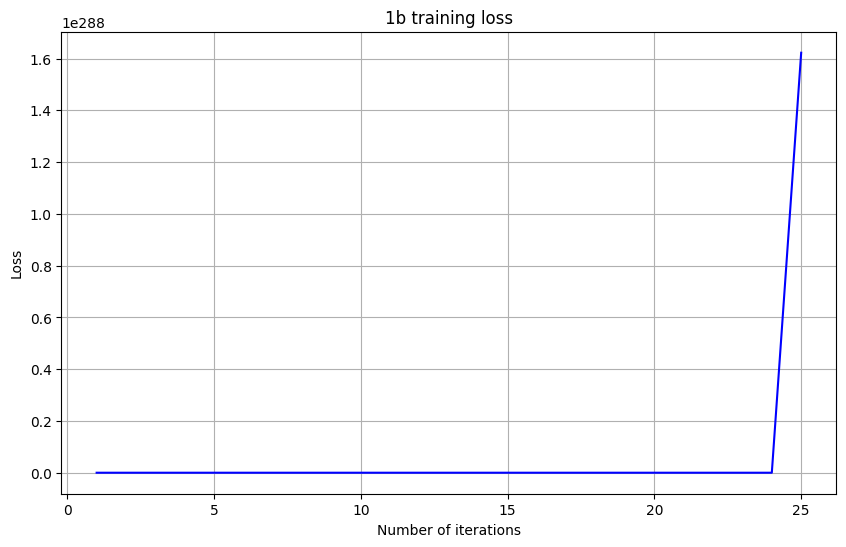

In [118]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1b training loss') 

Text(0.5, 1.0, '1b validation loss')

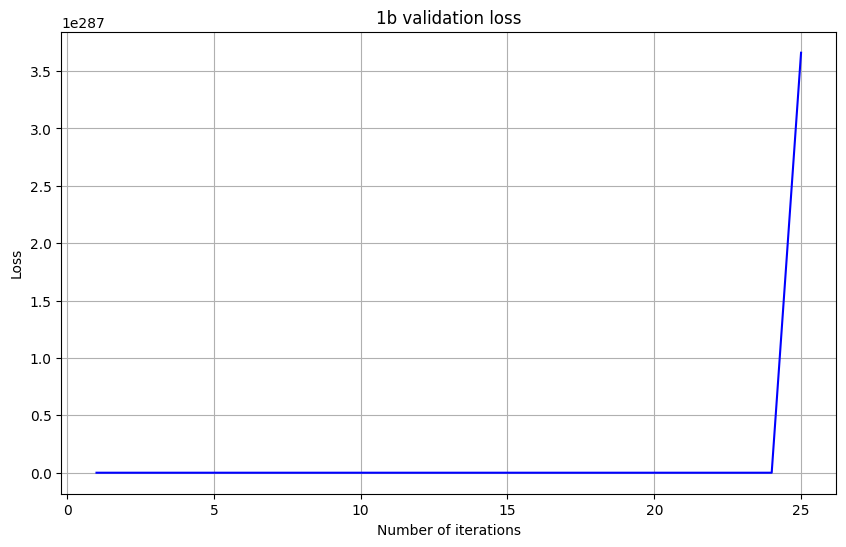

In [119]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1b validation loss') 

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [27]:
# Problem 2a, multiple linear regression with standardization and normalization
# for housing market with parameters:
# area, bedrooms, bathrooms, stories, parking
from sklearn import preprocessing
lr = 10 ** -2; # Optimal learning rate

In [29]:
# Input variables, standized and normalized sets
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [30]:
x_std[0:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [31]:
x_norm[0:5]

array([[9.99999700e-01, 5.39083396e-04, 2.69541698e-04, 4.04312547e-04,
        2.69541698e-04],
       [9.99999645e-01, 4.46428413e-04, 4.46428413e-04, 4.46428413e-04,
        3.34821310e-04],
       [9.99999894e-01, 3.01204787e-04, 2.00803192e-04, 2.00803192e-04,
        2.00803192e-04],
       [9.99999707e-01, 5.33333177e-04, 2.66666588e-04, 2.66666588e-04,
        3.99999883e-04],
       [9.99999773e-01, 5.39083436e-04, 1.34770859e-04, 2.69541718e-04,
        2.69541718e-04]])

In [32]:
# Output variable (housing price), scaled to prevent absurdly huge loss
y = hd[['price']]
standardizer = preprocessing.StandardScaler().fit(y)
y_std = standardizer.transform(y)
y_norm = preprocessing.normalize(y,axis=0)

In [33]:
y_std[0:5]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918]])

In [34]:
y_norm[0:5]

array([[0.11127257],
       [0.1024879 ],
       [0.1024879 ],
       [0.10219507],
       [0.09546015]])

In [35]:
# Standardized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2a standardized regression: ",theta)
print("training loss history for 2a standardized regression: ", train_loss)
print("validation loss history for 2a standardized regression: ", val_loss)

theta values for 2a standardized regression:  [[-0.02478977]
 [ 0.35840677]
 [ 0.03618391]
 [ 0.33298525]
 [ 0.25843847]
 [ 0.17437524]]
training loss history for 2a standardized regression:  [0.48048479 0.4704646  0.4608261  ... 0.20710351 0.20710351 0.20710351]
validation loss history for 2a standardized regression:  [0.13175172 0.12949257 0.12731721 ... 0.06832487 0.06832487 0.06832488]


Text(0.5, 1.0, '2a standardized set training loss')

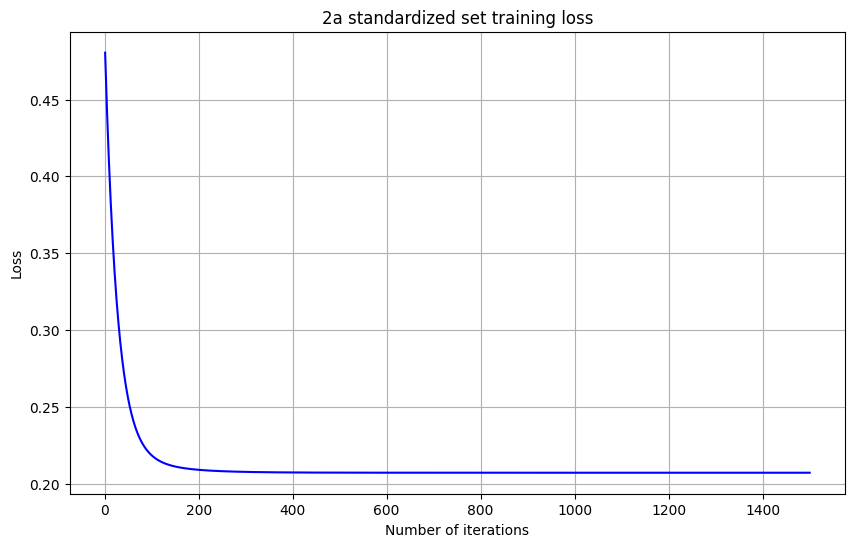

In [37]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a standardized set training loss') 

Text(0.5, 1.0, '2a standardized set validation loss')

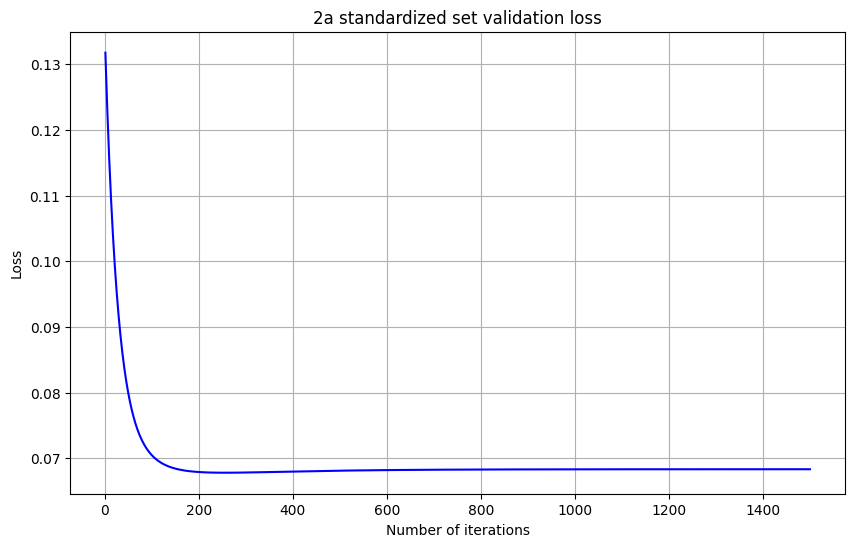

In [38]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a standardized set validation loss') 

In [39]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2a normalized regression: ",theta)
print("training loss history for 2a normalized regression: ", train_loss)
print("validation loss history for 2a normalized regression: ", val_loss)

theta values for 2a normalized regression:  [[ 2.02847063e-02]
 [ 2.02847167e-02]
 [-6.61032283e-06]
 [ 2.73852133e-06]
 [ 3.61162529e-06]
 [ 1.07788745e-05]]
training loss history for 2a normalized regression:  [0.00091274 0.00088144 0.00085138 ... 0.00012239 0.00012239 0.00012239]
validation loss history for 2a normalized regression:  [1.94016729e-04 1.86877338e-04 1.80034095e-04 ... 3.06829614e-05
 3.06829614e-05 3.06829614e-05]


Text(0.5, 1.0, '2a normalized set training loss')

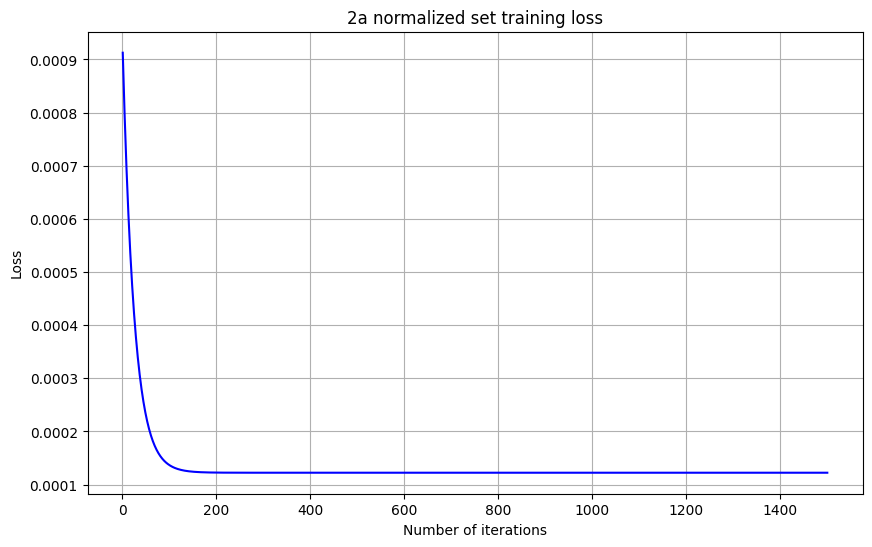

In [41]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a normalized set training loss') 

Text(0.5, 1.0, '2a normalized set validation loss')

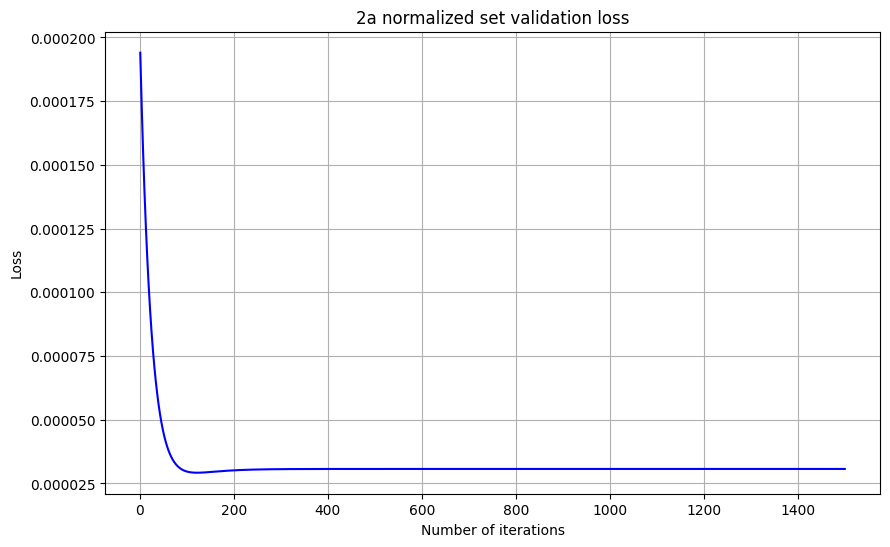

In [42]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a normalized set validation loss') 

In [ ]:
# The normalized set appears to perform better for 2 reasons: 
# 1) it does not overfit the model as seen in the period rising loss of the standardized model
# 2) the overall validation loss over all iterations is lower by a factor of roughly 480

In [43]:
# Problem 2b, multiple linear regression with standardization and normalization
# for housing market with parameters:
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
# hotwaterheating, airconditioning, parking, prefarea
lr = 10 ** -2; # Optimal learning rate

In [44]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [45]:
# Create standardized and normalized sets
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [46]:
pd.DataFrame(x_std[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035


In [47]:
pd.DataFrame(x_norm[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.000539,0.000270,0.000404,0.000270,0.000135,0.000000,0.000000,0.0,0.000135,0.000135
1,1.0,0.000446,0.000446,0.000446,0.000335,0.000112,0.000000,0.000000,0.0,0.000112,0.000000
2,1.0,0.000301,0.000201,0.000201,0.000201,0.000100,0.000000,0.000100,0.0,0.000000,0.000100
3,1.0,0.000533,0.000267,0.000267,0.000400,0.000133,0.000000,0.000133,0.0,0.000133,0.000133
4,1.0,0.000539,0.000135,0.000270,0.000270,0.000135,0.000135,0.000135,0.0,0.000135,0.000000


In [48]:
# Standardized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2b standardized regression: ",theta)
print("training loss history for 2b standardized regression: ", train_loss)
print("validation loss history for 2b standardized regression: ", val_loss)

theta values for 2b standardized regression:  [[-0.01487427]
 [ 0.31532075]
 [ 0.03873683]
 [ 0.23360041]
 [ 0.22029453]
 [ 0.10986757]
 [ 0.07412671]
 [ 0.05745963]
 [ 0.10162421]
 [ 0.06541409]
 [ 0.22443671]
 [ 0.15533043]]
training loss history for 2b standardized regression:  [0.46811285 0.45362698 0.43982799 ... 0.15314584 0.15314584 0.15314584]
validation loss history for 2b standardized regression:  [0.13800461 0.13449154 0.13113325 ... 0.05395965 0.05395967 0.05395969]


Text(0.5, 1.0, '2b standardized set training loss')

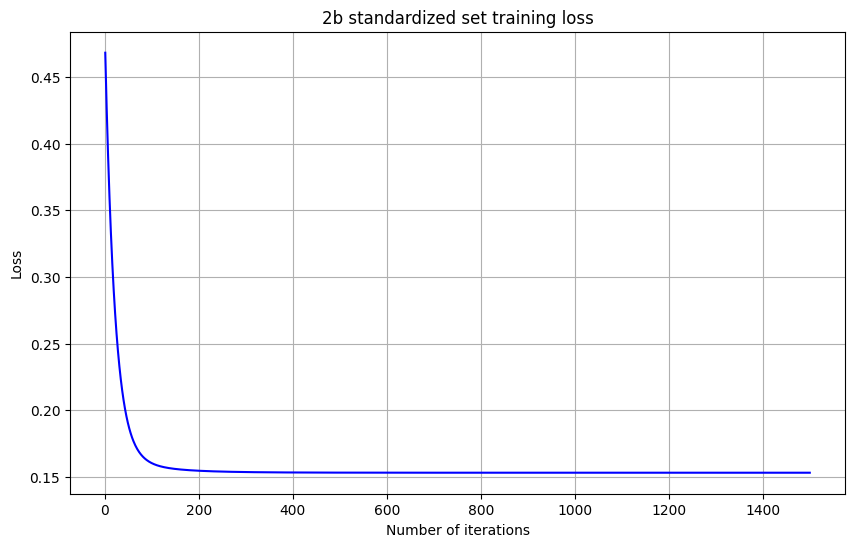

In [50]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b standardized set training loss') 

Text(0.5, 1.0, '2b standardized set validation loss')

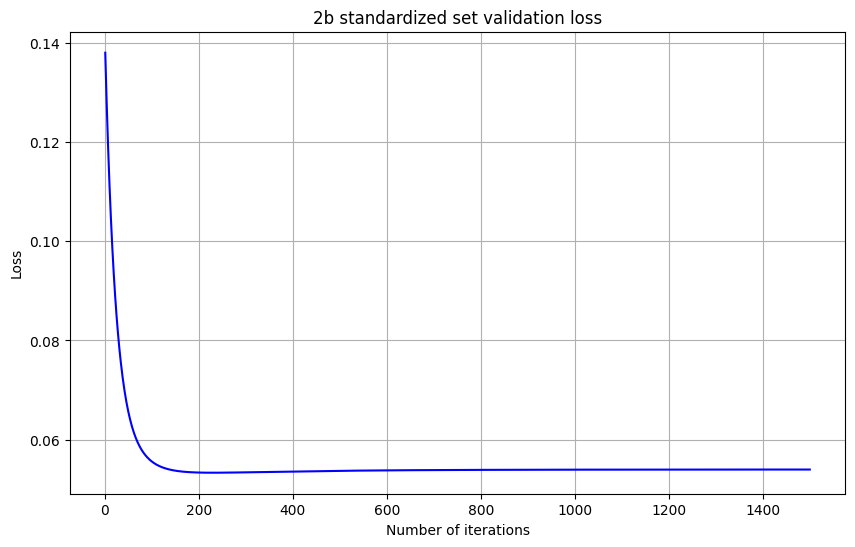

In [51]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b standardized set validation loss') 

In [52]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [53]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2b normalized regression: ",theta)
print("training loss history for 2b normalized regression: ", train_loss)
print("validation loss history for 2b normalized regression: ", val_loss)

theta values for 2b normalized regression:  [[ 1.98597442e-02]
 [ 1.98597540e-02]
 [-6.41417528e-06]
 [ 2.40969551e-06]
 [ 4.83200984e-06]
 [ 1.16611677e-05]
 [-4.70883040e-09]
 [ 3.82647604e-06]
 [ 1.76598618e-06]
 [ 8.99826070e-07]
 [ 7.81119361e-06]
 [ 3.98850321e-06]]
training loss history for 2b normalized regression:  [0.00087849 0.00084849 0.00081967 ... 0.0001209  0.0001209  0.0001209 ]
validation loss history for 2b normalized regression:  [2.29096498e-04 2.21440080e-04 2.14083791e-04 ... 3.18830356e-05
 3.18830356e-05 3.18830356e-05]


Text(0.5, 1.0, '2b normalized set training loss')

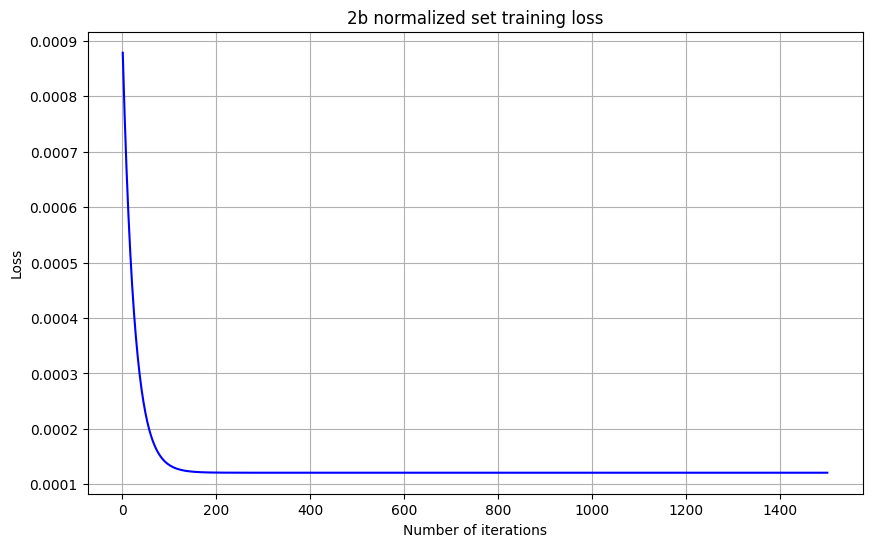

In [54]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b normalized set training loss') 

Text(0.5, 1.0, '2b normalized set validation loss')

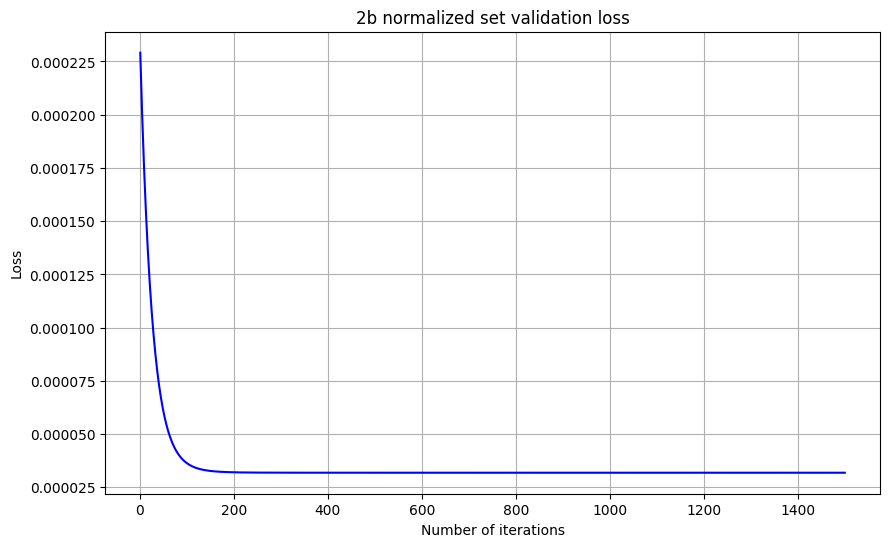

In [55]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b normalized set validation loss')

In [ ]:
# The normalized set again had much lower validation loss, making it the superior model

In [ ]:
##_________________________________________##
## Problem 3
##_________________________________________##

In [64]:
def gradient_descent_parameter_penalties(X, y, Xval, Yval, theta, lr, iterations, Lambda): 
    history = np.zeros(iterations) 
    val_history = np.zeros(iterations)
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors) #(variables+1) x 1
        theta = (1-lr*Lambda/samples)*theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, y, theta) 
        val_history[i] = compute_loss(Xval, Yval, theta)

    return theta, history, val_history

In [57]:
# Problem 3a, multiple linear regression with standardization, normalization and parameter penalties
# for housing market with parameters:
# area, bedrooms, bathrooms, stories, parking

lr = 10 ** -2 # Optimal learning rate
Lambda = 10 ** -3

In [59]:
# Input variables, standized and normalized sets
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [60]:
# Output variable (housing price), scaled to prevent absurdly huge loss
y = hd[['price']]
standardizer = preprocessing.StandardScaler().fit(y)
y_std = standardizer.transform(y)
y_norm = preprocessing.normalize(y,axis=0)

In [81]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [82]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_parameter_penalties(x_train,y_train,x_test,y_test,theta,lr,iters,Lambda)
print("theta values for 3a normalized regression: ",theta)
print("training loss history for 3a normalized regression: ", train_loss)
print("validation loss history for 3a normalized regression: ", val_loss)

theta values for 3a normalized regression:  [[ 1.96691085e-02]
 [ 1.96691159e-02]
 [-4.14939674e-06]
 [ 2.96035944e-06]
 [ 5.07156806e-06]
 [ 1.00077726e-05]]
training loss history for 3a normalized regression:  [0.00088416 0.00085406 0.00082516 ... 0.00012401 0.00012401 0.00012401]
validation loss history for 3a normalized regression:  [2.23359201e-04 2.15745964e-04 2.08434137e-04 ... 2.89467212e-05
 2.89467212e-05 2.89467212e-05]


Text(0.5, 1.0, '3a normalized set training loss')

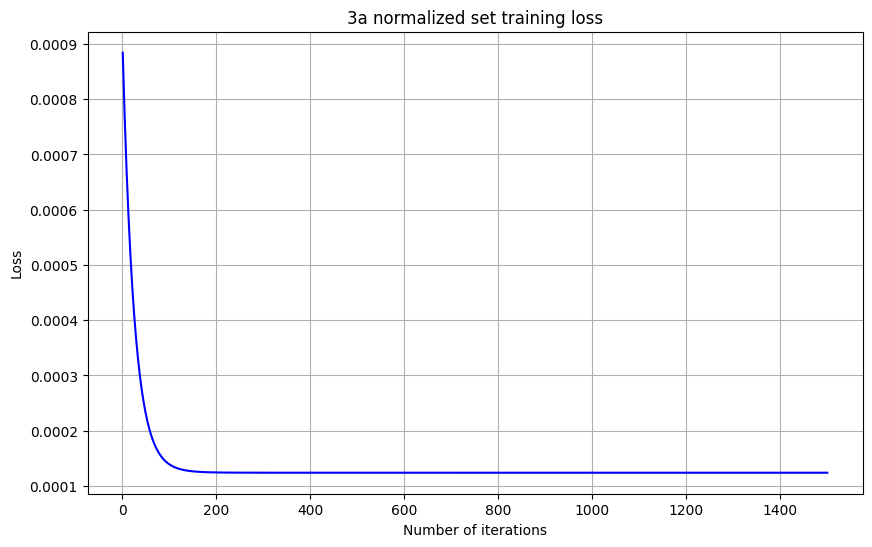

In [83]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('3a normalized set training loss') 

Text(0.5, 1.0, '3a normalized set validation loss')

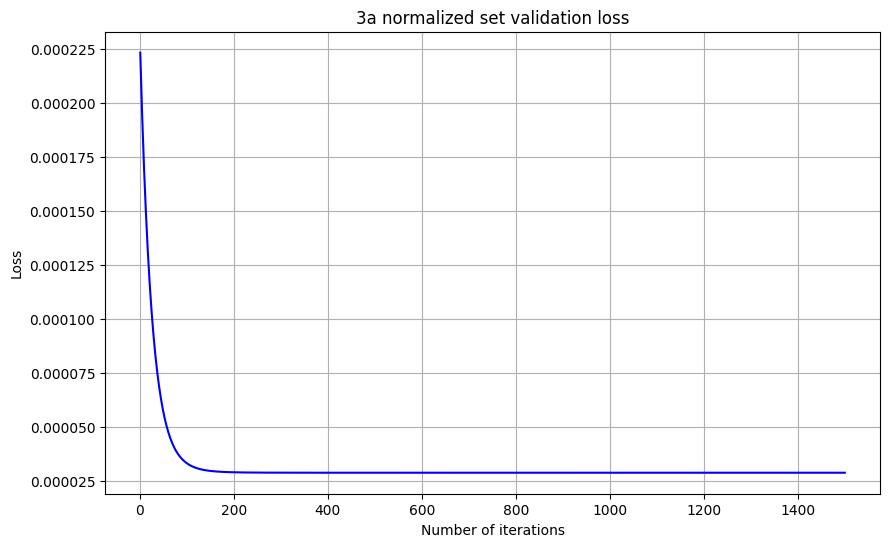

In [84]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('3a normalized set validation loss') 

In [ ]:
# Loss with parameter penalties ended up being significantly lower than the 2a set

In [ ]:
# Problem 3b, multiple linear regression with normalization and parameter penalties
# for housing market with parameters:
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
# hotwaterheating, airconditioning, parking, prefarea
lr = 10 ** -2; # Optimal learning rate

In [88]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [91]:
# Input variables, standized and normalized sets
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [92]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [93]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_parameter_penalties(x_train,y_train,x_test,y_test,theta,lr,iters,Lambda)
print("theta values for 3b normalized regression: ",theta)
print("training loss history for 3b normalized regression: ", train_loss)
print("validation loss history for 3b normalized regression: ", val_loss)

theta values for 3b normalized regression:  [[ 1.99696054e-02]
 [ 1.99696136e-02]
 [-4.76491475e-06]
 [ 3.38390977e-06]
 [ 3.89809334e-06]
 [ 1.05812209e-05]
 [ 2.68157691e-07]
 [ 3.62038819e-06]
 [ 1.55538539e-06]
 [ 6.42024648e-07]
 [ 6.72047808e-06]
 [ 3.42689827e-06]]
training loss history for 3b normalized regression:  [0.00091503 0.000884   0.00085421 ... 0.00013148 0.00013148 0.00013148]
validation loss history for 3b normalized regression:  [1.91894061e-04 1.84649301e-04 1.77703034e-04 ... 2.12979547e-05
 2.12979547e-05 2.12979547e-05]


Text(0.5, 1.0, '3b normalized set training loss')

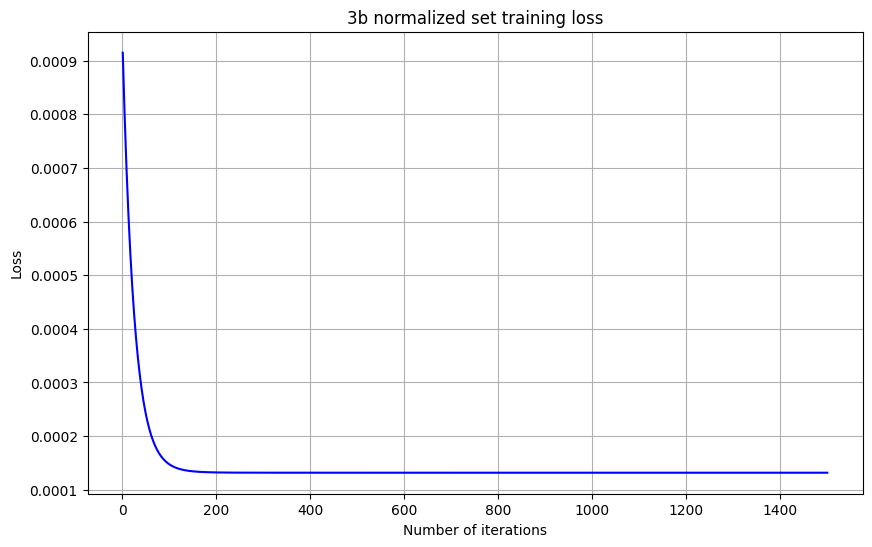

In [95]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('3b normalized set training loss') 

Text(0.5, 1.0, '3b normalized set validation loss')

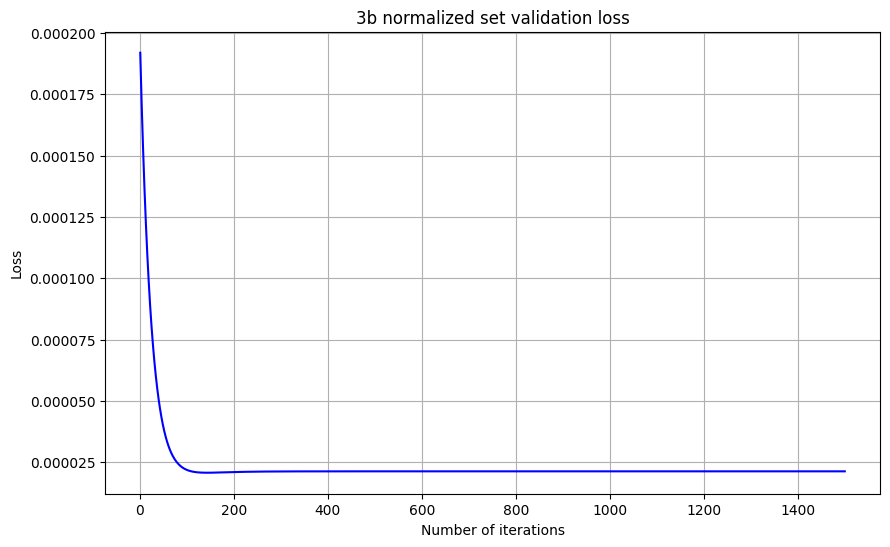

In [96]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('3b normalized set validation loss') 

In [ ]:
# Yet again, the validation loss of the model was brought down by the parameter as compared to its 
# counterpart in 2b.